In [1]:
import os, sys, glob, scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Plan

1. Describe the task
2. Make the simplest visualization you can think of that contains:
    - the Dependent Variable, i.e. the behavior of the participants that you're trying to model/predict/explain/account for/etc
    - the Independent Variable(s), i.e. the features of the trial that you think might influence behavior
    - draw each trial as a point on this graph
3. Think of possible models that would generate similar values for the DV given the observed values for the IV

## 2. Make a visualization

##### Load some data

In [8]:
analysis_dir = os.path

data_dir = analysis_dir + '/Data'
data_dir

data = pd.read_csv(data_dir + '/Study1_UG_Data.csv')
data
#data_dir = '/Users/jvanbaar/Dropbox (Brown)/Postdoc FHL/Teaching/Computational_modeling_tutorial/Data/Joey'

TypeError: 'module' object is not callable

In [39]:
data = pd.read_csv(data_dir + '/Study1_UG_Data.csv')
data = data[['sub','trial','unfairness','choice']]
data['offer'] = 100 - data['unfairness']
data.head()

,sub,trial,unfairness,choice,offer
0,1,1,50,0,50
1,1,2,80,0,20
2,1,3,95,0,5
3,1,4,60,0,40
4,1,5,75,0,25


##### Make a simple plot

In [42]:
sub = 2
# sub_dat = data.loc[data['sub']==2, :]
sub_data = data.query('sub == 2')
sub_data.head()

,sub,trial,unfairness,choice,offer
20,2,1,60,0,40
21,2,2,55,0,45
22,2,3,85,1,15
23,2,4,95,1,5
24,2,5,65,0,35


##### Plot each trial independently, use transparency to visualize overlap

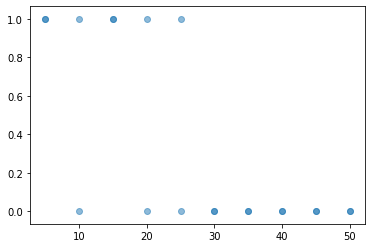

In [44]:
plt.scatter(x = sub_data['offer'], y = sub_data['choice'], alpha = .5)

##### Average over trials with the same offer

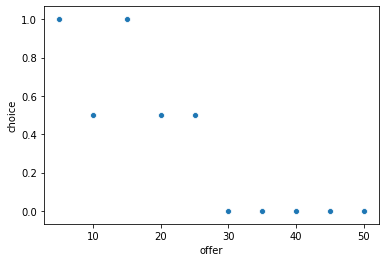

In [51]:
sns.scatterplot(x = 'offer', y = 'choice',
            data = sub_data.groupby(['offer'], as_index = False).mean())

## 3. Think of a model that can recreate this plot

- Model 1: always accept.
- Model 2: always reject.
- Model 3: act randomly.
- Model 4: maximize payoff ('greed').
- Model 5: minimize payoff ('inverse greed').
- Model 6: unfairness punisher (reject with a probability P proportional to the unfairness of the offer).
- Model 7: inequity aversion.

In [58]:
def model_1(offer):
    
    choice = 0
    
    return choice

In [59]:
def model_2(offer):
    
    choice = 1
    
    return choice

In [60]:
def model_3(offer):
    
    choice = np.random.randint(0,2)
    
    return choice

In [92]:
def model_4(offer):
    
    choice_options = [0,1]
#     payoffs = offer * (1 - choice_options)
    payoffs = [offer,0]
    
#     # Find the highest-payoff choice option:
#     if payoffs[0] > payoffs[1]:
#         choice = choice_options[0]
#     elif payoffs[1] > payoffs[0]:
#         choice = choice_options[1]
#     else:
#         choice = choice_options[np.random.randint(0,len(choice_options))]
    
    # A quicker way?
    choice_index = np.where(payoffs == np.max(payoffs))[0][0]
    choice = choice_options[choice_index]
    
    return choice

In [97]:
# Make more models here

## 4. Simulating task data

In [100]:
simulated_sub_data = sub_dat[['trial','offer','choice']].copy()
simulated_sub_data['choice'] = np.nan
simulated_sub_data.head()

,trial,offer,choice
20,1,40,NaN
21,2,45,NaN
22,3,15,NaN
23,4,5,NaN
24,5,35,NaN


In [109]:
simulated_sub_data.loc[simulated_sub_data['trial']==trial, 'offer'].values

array([40])

In [111]:
chosen_model = model_4
for trial in simulated_sub_data['trial']:
#     print(trial)
    offer = simulated_sub_data.loc[simulated_sub_data['trial']==trial, 'offer'].values
    predicted_choice = chosen_model(offer)
    simulated_sub_data.loc[simulated_sub_data['trial']==trial,'choice'] = predicted_choice

In [112]:
simulated_sub_data

,trial,offer,choice
20,1,40,0.0
21,2,45,0.0
22,3,15,0.0
23,4,5,0.0
24,5,35,0.0
25,6,45,0.0
26,7,20,0.0
27,8,50,0.0
28,9,10,0.0
29,10,10,0.0


So here we have a dataset – basically a list of trials that together constitute an experiment – with simulated task data! We've basically generated a pseudo-subject based on one of the models we defined. In the next steps, we will compare such simulated datasets to our actually observed subject data. The more similar a model's simulation is to observed task data, the better the model 'fits' the data.

## For next time

- Get Joey's data from GitHub
- Try to code models 5, 6, and 7
- Simulate data from each model